<a href="https://colab.research.google.com/github/NandiniMarepalli/AI_ML_Internship_projects/blob/main/project2_HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# House price prediction system - Linear and ensemble models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_excel("HousePricePrediction.xlsx")
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [6]:
dataset.shape

(2919, 13)

In [7]:
obj=(dataset.dtypes=="object")
object_cols=list(obj[obj].index)
print("Categorical Variables:",len(object_cols))

int_ =(dataset.dtypes=="int")
int_cols=list(int_[int_].index)
print("Integer Variables:",len(int_cols))

flo=(dataset.dtypes=="float")
float_cols=list(flo[flo].index)
print("Float Variables:",len(float_cols))

Categorical Variables: 4
Integer Variables: 6
Float Variables: 3


<Axes: >

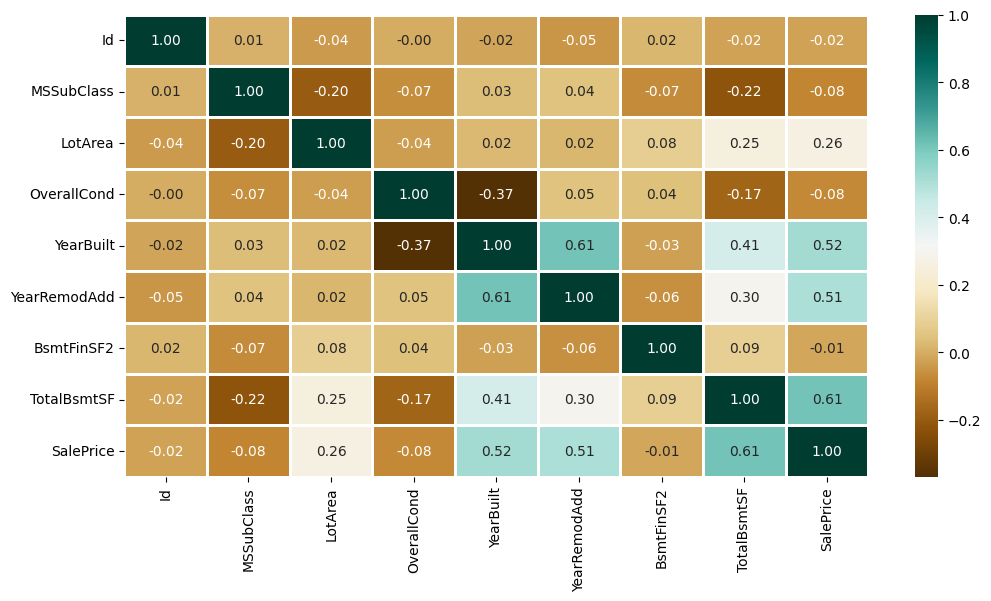

In [8]:
numerical_dataset=dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(numerical_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths = 2,
            annot= True)


<Axes: title={'center': 'Number of unique values of categorical variables'}>

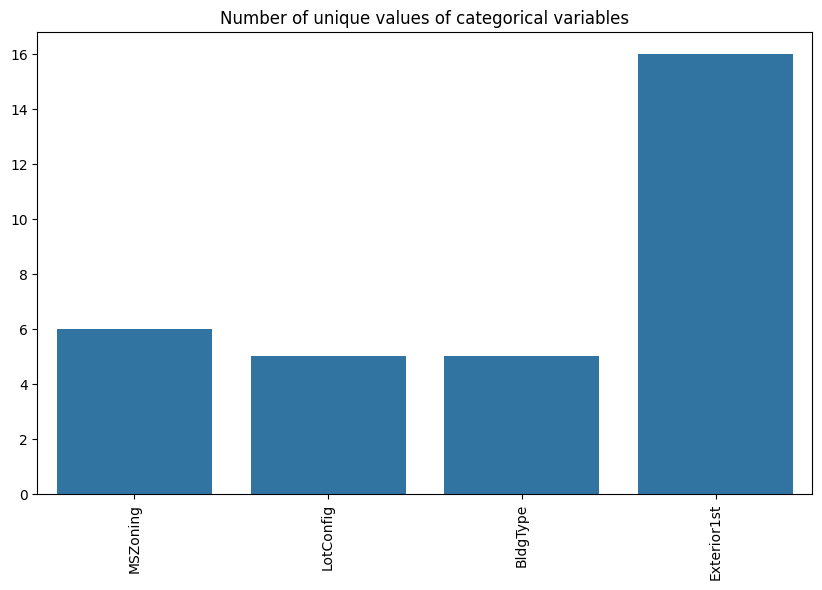

In [10]:
unique_values=[]
for col in object_cols:
  unique_values.append(dataset[col].unique().size)

plt.figure(figsize=(10,6))
plt.title('Number of unique values of categorical variables')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

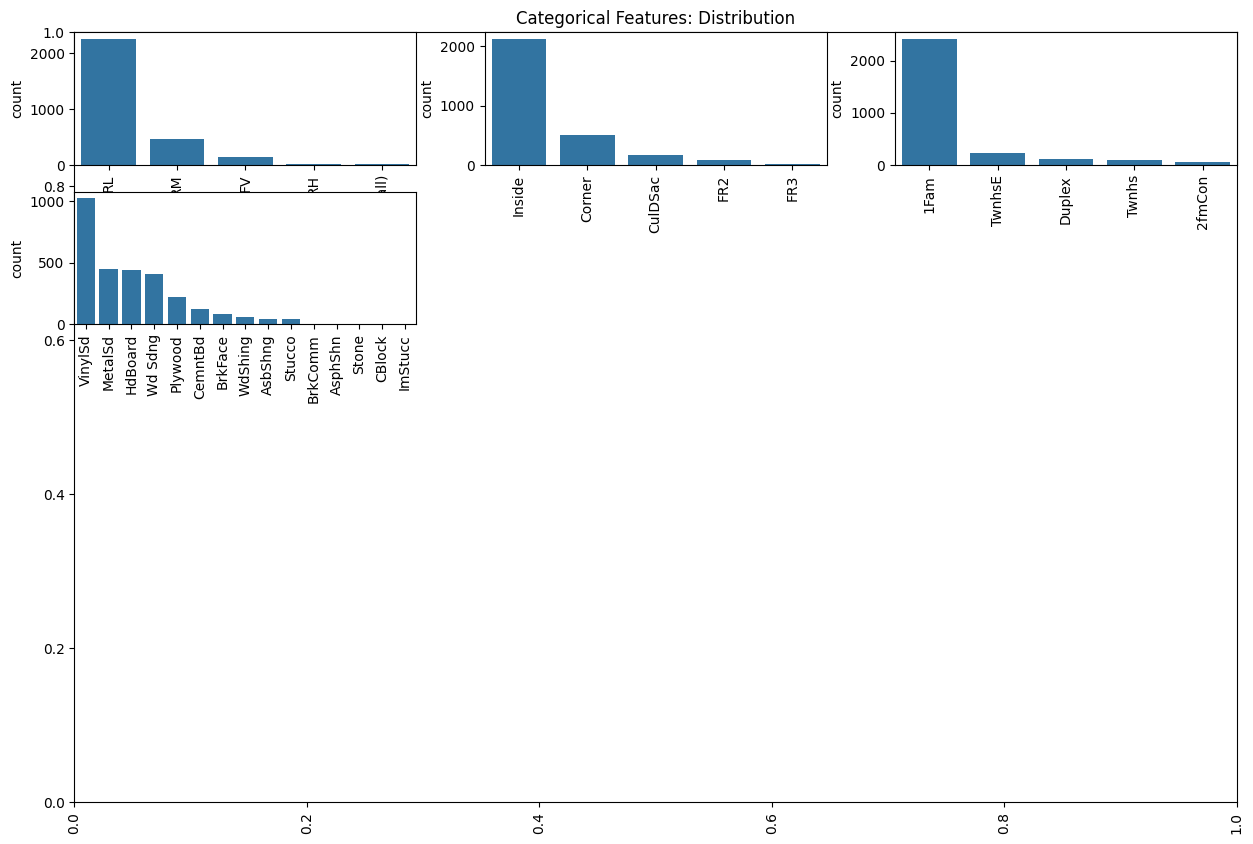

In [23]:
plt.figure(figsize=(15,10))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index=1

for col in object_cols:
  y=dataset[col].value_counts()
  plt.subplot(5,3, index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index),y=y)
  index +=1

In [24]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)   #As Id Column will not be participating in any prediction. So we can Drop it.

In [25]:
#Replacing SalePrice empty values with their mean values to make the data distribution symmetric.
dataset['SalePrice']=dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

In [26]:
#Drop records with null values (as the empty records are very less).
new_dataset=dataset.dropna()

In [27]:
#Checking features which have null values in the new dataframe (if there are still any).
new_dataset.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


In [28]:
from sklearn.preprocessing import OneHotEncoder

s=(dataset.dtypes=='object')
object_cols=list(s[s].index)
print("Categorical variables:")
print(object_cols)
print("No.of categorical features:",len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No.of categorical features: 4


In [29]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [30]:
#splitting the dataset into Training and Testing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

x=df_final.drop(['SalePrice'],axis=1)
y=df_final['SalePrice']

x_train, x_valid, y_train, y_valid = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)

In [31]:
#Model training and Accuracy
#Support Vector Machine

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR=svm.SVR()
model_SVR.fit(x_train,y_train)
Y_pred=model_SVR.predict(x_valid)

print(mean_absolute_percentage_error(y_valid,Y_pred))

0.1870512931870423


In [33]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

model_RFR=RandomForestRegressor(n_estimators=10)
model_RFR.fit(x_train,y_train)
Y_pred=model_RFR.predict(x_valid)

mean_absolute_percentage_error(y_valid,Y_pred)

0.18869400053523658

In [35]:
#Linear Regression
from sklearn.linear_model import LinearRegression

model_LR=LinearRegression()
model_LR.fit(x_train,y_train)
Y_pred=model_LR.predict(x_valid)

print(mean_absolute_percentage_error(y_valid,Y_pred))

0.1874168384159986
